In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
style.use('seaborn-poster')
style.use('ggplot')

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_10940\2324539283.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [3]:
df=pd.read_csv("Datasets\deseasonalize_data.csv")
df["date"]=pd.to_datetime(df["date"])
comm = df['Commodity'].unique().tolist()
#MSP(Minimum Support Prices)
df_msp = pd.read_csv("Datasets\CMO_MSP_Mandi_filtered.csv")
df_msp['commodity'] = df_msp['commodity'].str.lower()
commodities = df_msp['commodity'].unique().tolist()

df_msp = df_msp[df_msp['year'] != 2012]
df_msp = df_msp[df_msp['year'] != 2013]
df_msp["year"]=pd.to_datetime(df_msp["year"], format= '%Y')
df_msp.head()

commodity       year          Type  msprice  msp_filter
2   paddy-unhusked 2014-01-01  Kharif Crops   1360.0           1
3   paddy-unhusked 2015-01-01  Kharif Crops   1410.0           1
4   paddy-unhusked 2016-01-01  Kharif Crops   1470.0           1
7  rice(paddy-hus) 2014-01-01  Kharif Crops   1400.0           1
8  rice(paddy-hus) 2015-01-01  Kharif Crops   1450.0           1

In [4]:
def compare_price(apmc, commodity):
    
    label = str(apmc)+':'+str(commodity)
    data_filter = df[df["combination_label"]==label]
    
    
    if data_filter.shape[0] == 0: 
        return "Not enough data"
    
    msp = df_msp[df_msp['commodity'] == 'bajri']
    msp = msp[['year', 'msprice']]
    
    
    xaxis = pd.to_datetime(data_filter['date'])
    plt.figure(figsize=(9, 7))
    plt.plot(data_filter['date'], data_filter['modal_price'])
    plt.plot(data_filter['date'], data_filter['deseasonalise_price'])
    plt.plot(msp['year'], msp['msprice'], color = 'y')

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation=45)
    plt.legend(['Actual price', 'Deseasonalized Price', 'Mininmum Support price']) #Deseasonalized price is a price that has had the effects of seasonality removed. Seasonality is the tendency for prices to fluctuate in a regular pattern over time, such as the higher prices for electricity in the summer months or the higher prices for fruits and vegetables in the winter months.
    plt.show()

Enter the City Name: 
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Chandur Bajar
Enter Commodity within that City: pigeon pea (tur)


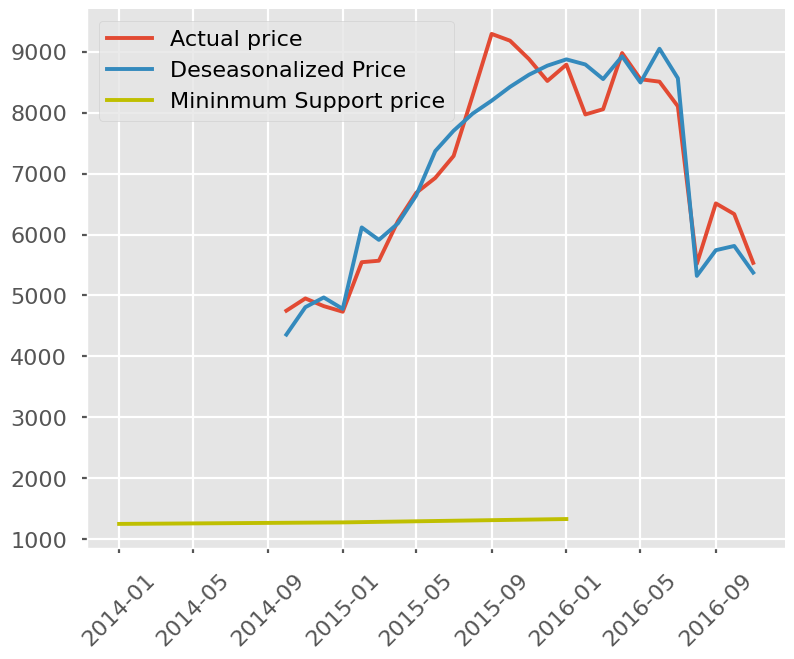

In [5]:
apmc = input('Enter the City Name: ')
comm = input('Enter Commodity within that City: ')

compare_price(apmc, comm)

# Setting Flags

In [6]:
import pandas as pd
import scipy as stats

In [7]:
import scipy
print(scipy.__version__)

1.11.2


In [8]:
def highest_price_fluctuation(df): 
    data=[]
    commodities=df["combination_label"].unique().tolist()
    for commodity in commodities:
        df_temp=df[df["combination_label"]==commodity]
        value=scipy.stats.variation(df_temp["max_price"]) 
        data.append((commodity,value))
        
    data.sort(key=lambda x: x[1],reverse= True)
    data=[x[0] for x in data[:20]] 
    return data


In [9]:
df = pd.read_csv("Datasets\seasonal_data_analysis.csv")

In [10]:
df.head()

APMC Commodity  Year      Month  arrivals_in_qtl  min_price  max_price  \
0  Akole     bajri  2014  September               25       1467       1733   
1  Akole     bajri  2014    October               30       1390       1700   
2  Akole     bajri  2014   November               67       1400       1700   
3  Akole     bajri  2014   December               40       1375       1750   
4  Akole     bajri  2015    January               74       1395       1840   

   modal_price        date district_name   state_name  quarter  \
0       1650.0  2014-09-01    Ahmadnagar  Maharashtra        3   
1       1560.0  2014-10-01    Ahmadnagar  Maharashtra        4   
2       1550.0  2014-11-01    Ahmadnagar  Maharashtra        4   
3       1563.0  2014-12-01    Ahmadnagar  Maharashtra        4   
4       1580.0  2015-01-01    Ahmadnagar  Maharashtra        1   

  combination_label  
0       Akole:bajri  
1       Akole:bajri  
2       Akole:bajri  
3       Akole:bajri  
4       Akole:bajri

In [11]:
fluctuation=highest_price_fluctuation(df)

In [12]:
fluctuation

['Barshi:brinjal',
 'Barshi:tomato',
 'Barshi:cabbage',
 'Barshi:green chilli',
 'Barshi:flower',
 'Barshi:lemon',
 'Barshi:cluster bean',
 'Barshi:cucumber',
 'Barshi:ladies finger',
 'Barshi:capsicum',
 'Barshi:bitter gourd',
 'Pune:squash gourd',
 'Vadgaon Peth:tomato',
 'Mumbai:squash gourd',
 'Aurangabad:tomato',
 'Kalvan:onion',
 'Yeola:onion',
 'Shahada:maize',
 'Pune-Pimpri:onion',
 'Solapur:papai']

In [13]:
data_main=pd.DataFrame()
for commodity in fluctuation:
    
    # Setting the bar high with a range of upto 3 SD above the mean
    value=df[df["combination_label"]==commodity]["max_price"].std()*3
    
    df_temp=df[(df["combination_label"]==commodity)&(df["max_price"]>value)]
    df_temp=df_temp[["APMC","Commodity","Month","min_price","max_price"]]
    data_main=pd.concat([data_main,df_temp])
data_main.reset_index(drop=True)

APMC      Commodity      Month  min_price  max_price
0         Barshi        brinjal    October       2416       4163
1         Barshi         tomato       July       1467       2445
2         Barshi        cabbage       July        872       1486
3         Barshi   green chilli       July       3055       5190
4         Barshi         flower       July       1019       1641
5         Barshi         flower    October        673       1447
6         Barshi          lemon  September       2911       4647
7         Barshi   cluster bean    October       3095       4821
8         Barshi       cucumber    October        768       1590
9         Barshi  ladies finger       July       1232       2105
10        Barshi  ladies finger    October       1066       2106
11        Barshi       capsicum       July       2228       3569
12        Barshi   bitter gourd       July       1985       3156
13        Barshi   bitter gourd   November       1500       2444
14          Pune   squash gourd       June       2820       6300
15  Vadgaon Peth         tomato       June       1800       6706
16        Mumbai   squash gourd      April       2786       3550
17        Mumbai   squash gourd        May       3504       3952
18        Mumbai   squash gourd       June       4173       4727
19    Aurangabad         tomato       June       3556       5528
20    Aurangabad         tomato       July       1883       3321
21        Kalvan          onion     August       1114       5111
22        Kalvan          onion  September        953       5050
23        Kalvan          onion    October        905       3786
24         Yeola          onion     August       1539       4840
25         Yeola          onion  September       1743       4716
26         Yeola          onion    October       1087       3602
27       Shahada          maize      April       1213       6713
28   Pune-Pimpri          onion     August       3216       4574
29   Pune-Pimpri          onion  September       3733       4593
30   Pune-Pimpri          onion   November       3650       3875
31       Solapur          papai      April       1267       1367
32       Solapur          papai       June        753       1425
33       Solapur          papai       June        868       1890

In [45]:
data_main.to_csv(" Datasets\Final_model.csv",index=False)

OSError: Cannot save file into a non-existent directory: ' Datasets'